# <center>HW4</center> #
####  107000105 楊晶宇
***
## <u>Question 1.1</u>
## Implementation
#### 1.引用函式庫

In [1]:
import numpy as np
import pandas as pd
import math
from numpy.random import seed
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone
from itertools import combinations
import copy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline

#### 2.定義繪圖函式(同HW3)

#### 3. data preprocessing
#### 1)讀資料
觀察資料格式，幫columns上header

In [3]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header = None)
print(df.shape)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.head()

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


確認沒有Missing data

In [4]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

#### 2.Maping
因為資料皆為ordinal，所以用mapping的方式照關係順序填上數值

In [5]:
m = {'buying': {'high':3 , 'low': 1, 'med': 2, 'vhigh': 4},
        'maint': {'high':3 , 'low': 1, 'med': 2, 'vhigh': 4}, 
        'doors': {'2': 1, '3': 2, '4': 3, '5more': 4},
        'persons': {'2': 1, '4': 2, 'more': 3},
        'lug_boot': {'big': 3, 'med': 2, 'small': 1},
        'safety': {'high': 3, 'low': 1, 'med': 2},
        'class': {'acc': 2, 'good': 3, 'unacc': 1, 'vgood': 4}}
for h, M in m.items():
    print(h, ':', M)
    df[h] = df[h].map(M)

buying : {'high': 3, 'low': 1, 'med': 2, 'vhigh': 4}
maint : {'high': 3, 'low': 1, 'med': 2, 'vhigh': 4}
doors : {'2': 1, '3': 2, '4': 3, '5more': 4}
persons : {'2': 1, '4': 2, 'more': 3}
lug_boot : {'big': 3, 'med': 2, 'small': 1}
safety : {'high': 3, 'low': 1, 'med': 2}
class : {'acc': 2, 'good': 3, 'unacc': 1, 'vgood': 4}


#### 3.combine class
應1.1要求，把class number 由 4 降為 2，1、2一個group，3、4一個group

In [6]:
df1 = copy.deepcopy(df)
m1 = {1:0, 2:0, 3:1, 4:1}
df1['class'] = df1['class'].map(m1)

切分數據、standardlize

In [7]:
X = df1.iloc[:, :6]
y = df1.iloc[:, 6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### 4.train model
用LogisticRegression、RandomForest、Decisiontree、SVM 訓練，參數選擇在下一題(1.2)會說明
##### 1)LogisticRegression

In [8]:
lr = LogisticRegression(random_state = 1, solver = 'lbfgs', multi_class = 'ovr')
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_train_std)
print('Misclassified examples of training set: %d' % (y_train != y_pred).sum())
print('ACC of training set: %.7f' % lr.score(X_train_std, y_train))
y_pred = lr.predict(X_test_std)
print('Misclassified examples of testing set: %d' % (y_test != y_pred).sum())
print('ACC of testing set : %.7f' % lr.score(X_test_std, y_test))

Misclassified examples of training set: 39
ACC of training set: 0.9677419
Misclassified examples of testing set: 31
ACC of testing set : 0.9402697


##### 2)RandomForestClassifier

In [9]:
forest = RandomForestClassifier(criterion = 'gini', n_estimators =100, min_samples_split = 20,  random_state = 1, n_jobs = 2)
forest.fit(X_train_std, y_train)
y_pred = forest.predict(X_train_std)
print('Misclassified examples of training set: %d' % (y_train != y_pred).sum())
print('ACC of training set: %.7f' % forest.score(X_train_std, y_train))
y_pred = forest.predict(X_test_std)
print('Misclassified examples of testing set: %d' % (y_test != y_pred).sum())
print('ACC of testing set : %.7f' % forest.score(X_test_std, y_test))

Misclassified examples of training set: 28
ACC of training set: 0.9768404
Misclassified examples of testing set: 20
ACC of testing set : 0.9614644


##### 3)DecisionTreeClassifier

In [10]:
tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 12, max_leaf_nodes=5,  random_state = 1)
tree.fit(X_train_std, y_train)
y_pred = tree.predict(X_train_std)
print('Misclassified examples of training set: %d' % (y_train != y_pred).sum())
print('ACC of training set: %.7f' % tree.score(X_train_std, y_train))
y_pred = tree.predict(X_test_std)
print('Misclassified examples of testing set: %d' % (y_test != y_pred).sum())
print('ACC of testing set : %.7f' % tree.score(X_test_std, y_test))

Misclassified examples of training set: 45
ACC of training set: 0.9627792
Misclassified examples of testing set: 21
ACC of testing set : 0.9595376


###### 4)SVM

In [11]:
svm = SVC(C =100, gamma = 0.1, kernel = 'rbf', random_state = 1)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_train_std)
print('Misclassified examples of training set: %d' % (y_train != y_pred).sum())
print('ACC of training set: %.7f' % svm.score(X_train_std, y_train))
y_pred = svm.predict(X_test_std)
print('Misclassified examples of testing set: %d' % (y_test != y_pred).sum())
print('ACC of testing set : %.7f' % svm.score(X_test_std, y_test))

Misclassified examples of training set: 0
ACC of training set: 1.0000000
Misclassified examples of testing set: 5
ACC of testing set : 0.9903661


在四組模型中，準確率表現最佳的是SVM，training acc有達100%，testing acc有達99% <br>
因此選擇SVM作為我們訓練第一題的模型

## <u>Question 1.2</u>

In [12]:
X = df.iloc[:, :6].values
y = df.iloc[:, 6].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### 1.Fine-tune model via Grid Search

為了要訓練到好一點的模型，我試著將我們學過的一些模型用Grid Search去調整參數，<br>
比較每種模型中最佳參數的cross val score(因為cross val score比train set acc更有說服力，<br>
比較不會過度fit train set裡的所有data，而是輪流取train set裡的一部分做test data算acc，<br>
這樣平均的acc對我們在predict測試集的acc比較不會偏差太多)

##### 1) SVM
調整C, gama從0.0001一直到1000(等比級數，公比10)<br>
調整kernel，分別是linear和rbf

In [13]:
start_time = time.time()
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid = [{'svc__C':param_range,'svc__kernel':['linear']},{'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10)
gs = gs.fit(X_train,y_train)
end_time = time.time()
print("time：%.3f S" % float(end_time-start_time))
print(gs.best_score_)
print(gs.best_params_)

time：53.021 S
0.9793250688705232
{'svc__C': 100.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


##### 2)DecisionTree
調整參數max_depth，從1~50放進去Grid Search

In [14]:
start_time = time.time()
param_grid=[{'max_depth':list(range(1, 50)) + [None]}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),param_grid=param_grid,scoring='accuracy',cv=10)
gs = gs.fit(X_train_std,y_train)
end_time = time.time()
print("time：%.3f S" % float(end_time-start_time))
print('best score:', gs.best_score_)
print('best params', gs.best_params_)

time：0.741 S
best score: 0.9760123966942148
best params {'max_depth': 11}


##### 3)RandomForest
調整max_depth從1到50(等差5)，調整max_leaf_nodes從10到50(等差5)

In [15]:
start_time = time.time()
forest = RandomForestClassifier(n_estimators =100, random_state=1)
param_grid=[{'max_depth':list(range(1, 51,5)) + [None], 'max_leaf_nodes':list(range(10,51,5))+ [None]}]
gs = GridSearchCV(estimator=forest,param_grid=param_grid,scoring='accuracy',cv=10)
gs = gs.fit(X_train_std,y_train)
end_time = time.time()
print("time：%.3f S" % float(end_time-start_time))
print('best score:', gs.best_score_)
print('best params', gs.best_params_)

time：205.204 S
best score: 0.9702066115702479
best params {'max_depth': 11, 'max_leaf_nodes': None}


##### 4)KNN
調整參數n_neighbors從1到50，等差1

In [16]:
start_time = time.time()
gs = GridSearchCV(estimator=KNeighborsClassifier(p = 2, metric = 'minkowski')
                              ,param_grid=[{'n_neighbors':list(range(1,50,1))}],
                                      scoring='accuracy',cv=10)
gs = gs.fit(X_train_std,y_train)
end_time = time.time()
print("time：%.3f S" % float(end_time-start_time))
print('best score:', gs.best_score_)
print('best params', gs.best_params_)

time：5.553 S
best score: 0.946232782369146
best params {'n_neighbors': 7}


##### 5)LogisticRegression
條整參數C從0.0001到1000(公比10)

In [17]:
start_time = time.time()
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
gs = GridSearchCV(estimator=LogisticRegression(random_state = 1, solver = 'lbfgs', multi_class = 'ovr')
                              ,param_grid=[{'C':param_range}],
                                      scoring='accuracy',cv=10)
gs = gs.fit(X_train_std,y_train)
end_time = time.time()
print("time：%.3f S" % float(end_time-start_time))
print(gs.best_score_)
print(gs.best_params_)

time：2.140 S
0.8180440771349863
{'C': 100.0}


##### 補) 討論時間複雜度
我們觀察上面所有model的time，可以發現RandomForest花費的時間最久，原因有很多<br>
其一，RandomForest本身就是一個相較複雜的model<br>
其二，我們給RandomForest的param_grid共有11(range(1,50,5) + NONE)*9(range(10,51, 5) + NONE)= 99種組合<br>
等於跑了80個RandomForest的model(不一樣的param)<br>
其三，每個model又跑了CV = 10，做了10輪交叉驗證，因此時間必為沒有Grid Search的990倍以上(還沒有考慮數值變化對model演算法複雜度的影響)

影響時間長度的因素有：model本身的複雜度、cv值的大小、param_grid的組合數
下面試試看單純的Forest時間測試：

In [18]:
start_time = time.time()
forest = RandomForestClassifier(n_estimators =100, random_state=1)
forest = forest.fit(X_train_std,y_train)
end_time = time.time()
print("time：%.3f S" % float(end_time-start_time))

time：0.268 S


時間為0.268s比205.204少快1000倍(只是大約，因為這個time有關CPU與電腦本身的狀況)

#### 2.用Cross Validation選擇model
由上面Grid Search後的結果我們可以得知SVM、DecisionTree和Randomforest表現都不錯，達97%<br>
所以我們將上述三個的best param model拿出來用CV比較，看平均score(判斷精確性)及標準差(判斷穩定性)<br>
(其實這一題的score和上面GS出來的score是一樣的，主要是要看標準差)

In [19]:
svm = SVC(C =100, gamma = 0.1, kernel = 'rbf', random_state = 1)
scores = cross_val_score(svm, X_train_std, y_train, scoring='accuracy',cv=10)
print('CV acc: %.3f +- %.3f'% (np.mean(scores), np.std(scores)))

CV acc: 0.979 +- 0.008


In [20]:
forest = RandomForestClassifier(criterion = 'gini', n_estimators = 100, max_depth = 11, random_state = 1, n_jobs = 2)
scores = cross_val_score(forest, X_train_std, y_train, scoring='accuracy',cv=10)
print('CV acc: %.3f +- %.3f'% (np.mean(scores), np.std(scores)))

CV acc: 0.970 +- 0.017


In [21]:
tree = DecisionTreeClassifier(max_depth = 11, random_state=1)
scores = cross_val_score(tree, X_train_std, y_train, scoring='accuracy',cv=10)
print('CV acc: %.3f +- %.3f'% (np.mean(scores), np.std(scores)))

CV acc: 0.976 +- 0.011


由上面結果可以判斷：穩定性最高且精確度最高的是SVM<br>
因此，我最後選擇用SVM(剛剛Grid Search tune好的參數)作為我1.1和1.2題classfication的model

#### 4.testing on testing test

試看看上面的SVM model training和testing(順便看看DecisionTree的結果)

In [22]:
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_train_std)
print('Misclassified examples of training set: %d' % (y_train != y_pred).sum())
print('ACC of training set: %.7f' % svm.score(X_train_std, y_train))
y_pred = svm.predict(X_test_std)
print('Misclassified examples of testing set: %d' % (y_test != y_pred).sum())
print('ACC of testing set : %.7f' % svm.score(X_test_std, y_test))

Misclassified examples of training set: 2
ACC of training set: 0.9983457
Misclassified examples of testing set: 8
ACC of testing set : 0.9845857


In [23]:
tree.fit(X_train_std, y_train)
y_pred = tree.predict(X_train_std)
print('Misclassified examples of training set: %d' % (y_train != y_pred).sum())
print('ACC of training set: %.7f' % tree.score(X_train_std, y_train))
y_pred = tree.predict(X_test_std)
print('Misclassified examples of testing set: %d' % (y_test != y_pred).sum())
print('ACC of testing set : %.7f' % tree.score(X_test_std, y_test))

Misclassified examples of training set: 2
ACC of training set: 0.9983457
Misclassified examples of testing set: 10
ACC of testing set : 0.9807322


發現果然和前面CV分析的一樣，SVM的準確度較高，結果***training set acc為99.83%，testing set acc為98.45%***

## <u>Question 1.3</u>

##### 1.定義SBS函式

1.3主要是要做feature selection(analyze我寫在1.2了)，首先，先和老師上課講義一樣，定義SBS函式：<br>
* self.indices_是儲存k_features個features indexs(如果k_features = 3, 則indices儲存的三個feature index為<br>
  取三個train的集合中test acc最高的集合)
* combination(list, r)主要是取list中大小為r的所有subsets，如下
* 把剛剛combination return的所有subsets of features都丟進去estimator train，比較test acc，最高者丟進indices
* 重複動作直到符合k_features的大小

In [24]:
for p in combinations([1,2,3,4], 3):
    print(p)

(1, 2, 3)
(1, 2, 4)
(1, 3, 4)
(2, 3, 4)


In [25]:
class SBS(object):
    def __init__(self,estimator,k_features,scoring=accuracy_score,test_size=0.2,random_state=1):
        self.scoring=scoring
        self.estimator=clone(estimator)
        self.k_features=k_features
        self.test_size=test_size
        self.random_state=random_state
        
    def fit(self,X,y):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=self.test_size,random_state=self.random_state)
        dim=X_train.shape[1]
        self.indices_=tuple(range(dim))
        self.subsets_=[self.indices_]
        score=self._calc_score(X_train,X_test,y_train,y_test,self.indices_)
        self.scores_=[score]
        while dim>self.k_features:
            scores=[]
            subsets=[]
            for p in combinations(self.indices_,r=dim-1):
                score=self._calc_score(X_train,X_test,y_train,y_test,p)
                scores.append(score)
                subsets.append(p)
            best=np.argmax(scores)
            self.indices_=subsets[best]
            self.subsets_.append(self.indices_)
            dim-=1
            self.scores_.append(scores[best])
        self.k_score_=self.scores_[-1]
        return self
    
    def transform(self,X):
        return X[:,self.indices_]
    
    def _calc_score(self,X_train,X_test,y_train,y_test,indices):
        self.estimator.fit(X_train[:,indices],y_train)
        y_pred=self.estimator.predict(X_test[:,indices])
        score=self.scoring(y_test,y_pred)
        return score


#### 2.套用在SVM、DecisionTree、RandomForest上
##### 1)SVM

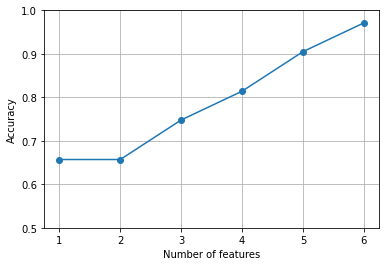

In [26]:
svm = SVC(C =100, gamma = 0.1, kernel = 'rbf', random_state = 1)
sbs=SBS(svm,k_features=1)
sbs.fit(X_train_std,y_train)
k_feat=[len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.5,1.0])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

##### 2)DecisionTree

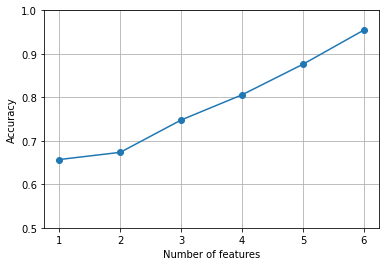

In [27]:
tree = DecisionTreeClassifier(criterion = 'gini',random_state = 1)
sbs=SBS(tree,k_features=1)
sbs.fit(X_train_std,y_train)
k_feat=[len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.5,1.0])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

##### 3)RandomForest

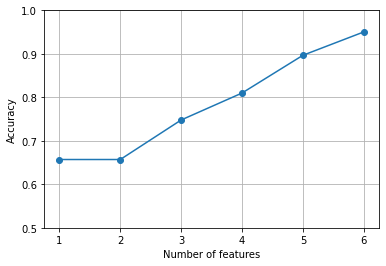

In [28]:
forest = RandomForestClassifier(criterion = 'gini', n_estimators =100,  random_state = 1, n_jobs = 2)
sbs=SBS(forest,k_features=1)
sbs.fit(X_train_std,y_train)
k_feat=[len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.5,1.0])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

觀察上面三張圖，我們可以發現三張圖都是斜直向上的線<br>
這表示***如果從全部feature中拿掉一個以上的feature，都會降低ACC***<br>
因為每一個點代表C 6 取 n的Subsets of features中ACC最高的subset<br>
最右邊的點代表feature全取的ACC，其為最高表示沒有降低features數量的必要性<br>

##### 3.SBS transform
觀察SVM的圖，我們可以用SBS試試看k_features=1帶入看選出的第一名的features:

In [29]:
sbs=SBS(svm,k_features=1)
sbs.fit(X_train_std,y_train)
print(sbs.indices_)

(0,)


表示feature 0(buying)最重要，試看看k_features = 5:

In [30]:
sbs=SBS(svm,k_features=5)
sbs.fit(X_train_std,y_train)
print(sbs.indices_)

(0, 1, 3, 4, 5)


代表feature 2(maint 維修費)最不重要，試看看5個features下去train是不是跟預期一樣，ACC會降低：

In [31]:
sbs=SBS(svm,k_features=5)
sbs.fit(X_train_std,y_train)
X_train_sbs = sbs.transform(X_train_std)
X_test_sbs = sbs.transform(X_test_std)
svm = SVC(C =100, gamma = 0.1, kernel = 'rbf', random_state = 1)
svm.fit(X_train_sbs,y_train)
y_pred = svm.predict(X_train_sbs)
print('Misclassified examples of training set: %d' % (y_train != y_pred).sum())
print('ACC of training set: %.7f' % svm.score(X_train_sbs, y_train))
y_pred = svm.predict(X_test_sbs)
print('Misclassified examples of testing set: %d' % (y_test != y_pred).sum())
print('ACC of testing set : %.7f' % svm.score(X_test_sbs, y_test))

Misclassified examples of training set: 47
ACC of training set: 0.9611249
Misclassified examples of testing set: 21
ACC of testing set : 0.9595376


結果如預期，ACC降低約3%，表示feature不用再拔掉，ACC不會提高

#### 4.PCA

用老師上課說過的PCA降維，試試看training的效果(一樣用Grid Search)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [35]:
start_time = time.time()
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0]
param_grid = [{'svc__C':param_range,'svc__kernel':['linear']},{'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10)
gs = gs.fit(X_train_pca,y_train)
end_time = time.time()
print("time：%.3f S" % float(end_time-start_time))
print(gs.best_score_)
print(gs.best_params_)

time：17.439 S
0.7692079889807163
{'svc__C': 10.0, 'svc__gamma': 100.0, 'svc__kernel': 'rbf'}


In [34]:
start_time = time.time()
param_grid=[{'max_depth':list(range(1, 50)) + [None]}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),param_grid=param_grid,scoring='accuracy',cv=10)
gs = gs.fit(X_train_pca,y_train)
end_time = time.time()
print("time：%.3f S" % float(end_time-start_time))
print('best score:', gs.best_score_)
print('best params', gs.best_params_)

time：2.444 S
best score: 0.7245592286501378
best params {'max_depth': 17}


#### 定義繪圖函式(同HW3)

In [36]:
def plot_decision_regions(X, y, classifier, test_idx=0, xlabel = '0', ylabel = '1', resolution=0.02):

    if test_idx == 0:
        test_idx = len(X)
        
    # setup marker generator and color map
    markers = ('s', '^', 'o', 'x', 'v')
    colors = ('red', 'blue', 'Chartreuse', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    dcolors = ('DarkRed', 'DarkBlue', 'DarkGreen', 'DarkGray', 'DarkCyan')
    dcmap = ListedColormap(dcolors[:len(np.unique(y))])
    tcolors = ('MistyRose', 'PaleTurquoise','PaleGreen','Gray','Gray')
    tcmap = ListedColormap(tcolors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=tcmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    X_train, y_train = X[:(test_idx-1),:], y[:(test_idx -1)]

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X_train[y_train == cl, 0], y=X_train[y_train == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker='o', label='train' + str(cl))

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx:, :], y[test_idx:]
        for idx, cl in enumerate(np.unique(y_test)):
            plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                    alpha=0.8, color=dcmap(idx),edgecolor = ['black'],
                    marker=markers[idx], label='test' + str(cl),
                    linewidths=1)
    plt.legend(loc = 'upper left')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

把剛剛上面tune好的參數帶入model，繪圖觀察PCA的結果及decision region：

Misclassified examples of training set: 128
ACC of training set: 0.8941274
Misclassified examples of testing set: 102
ACC of testing set : 0.8034682


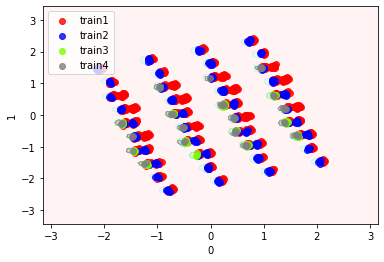

In [40]:
svm = SVC(C =10, gamma = 100, kernel = 'rbf', random_state = 1)
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_train_pca)
print('Misclassified examples of training set: %d' % (y_train != y_pred).sum())
print('ACC of training set: %.7f' % svm.score(X_train_pca, y_train))
y_pred = svm.predict(X_test_pca)
print('Misclassified examples of testing set: %d' % (y_test != y_pred).sum())
print('ACC of testing set : %.7f' % svm.score(X_test_pca, y_test))
plot_decision_regions(X_train_pca, y_train, svm)

可以發現，PCA大致上有保留features的特徵，紅、藍、綠、灰點大致上有分開<br>
但是model沒有比4個feature全留還要準，原因在於PCA還是壓縮掉了一些細節資訊<br>
部分重要資訊遺失導致準確率沒有比features全取還要高

### conclusion


這次作業讓我們練習了很多方法把model train得更好：
* Grid Search就像是暴力解，把所有參數組合都fit一遍，尋找最佳參數，減少了我們手動tune參數的時間
* Cross Validation讓我們能夠分析一個model的穩定度及效能
* 利用kfold來tune參數也能夠使model更加穩定，降低overfitting、data imbalance的影響
* Feature Selection能夠挑掉不重要的參數，雖然這次作業沒辦法挑掉feature，但像上次作業feature很多就可以
* PCA能夠降低features的維度，過濾掉不重要的資訊
<br>發現越做到後面，電腦要run的時間越久，也代表電腦也在花時間"learn"，時間換取的就是準確率，<br>
做完很有成就感，期待後面的課程內容